In [1]:
from mpasanalysis import *
import e3sm_res_cmp
%matplotlib inline

In [2]:
# get paths of restart files, monthly mean output files, processed climatology files and output figures
ts_ys = 21
ts_ye = 50
data_root = e3sm_res_cmp.load_paths_ocn(climo_ys=ts_ys, climo_ye=ts_ye, ts_ys=ts_ys, ts_ye=ts_ye,
                                        runname='low-res-cmp')
rst_root = data_root['rst_root']
ts_root = data_root['ts_root']
climo_root = data_root['climo_root']
fig_root = data_root['fig_root']
rst_file = rst_root+'/mpaso.rst.{:04d}-01-01_00000.nc'.format(ts_ye+1)
data_root_ice = e3sm_res_cmp.load_paths_ice(climo_ys=ts_ys, climo_ye=ts_ye, ts_ys=ts_ys, ts_ye=ts_ye,
                                            runname='low-res-cmp')
climo_root_ice = data_root_ice['climo_root']

Running on machine blueslogin3
Running on machine blueslogin3


In [3]:
# load dataset
f_rst = Dataset(rst_file, 'r')

In [4]:
# read grid information
lon = np.degrees(f_rst.variables['lonCell'][:])
lat = np.degrees(f_rst.variables['latCell'][:])
cellArea = f_rst.variables['areaCell'][:]


### March MLD

Plotting map of MLD (density threshold) (m) at region 'LabSea'


/home/qingli/.conda/envs/work/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'tri'
  s)


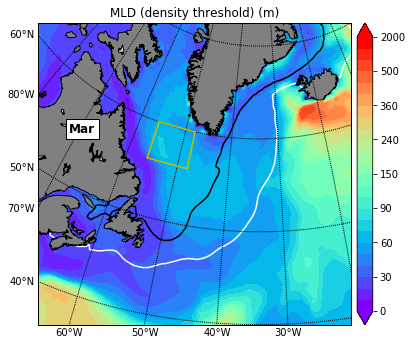

In [5]:
climo_file = climo_root+'/mixedLayerDepth/mpaso_03_climo.nc'
f_climo = Dataset(climo_file, 'r')
levels = np.array([0, 10, 20, 30, 40, 50, 60, 70, 80, 90,
                   110, 130, 150, 180, 210, 240, 280, 320, 360,
                   407, 454, 500, 1000, 1500, 2000])

fig = plt.figure(figsize=[6,6])
mld_d = f_climo.variables['timeMonthly_avg_dThreshMLD'][0,:]
mpaso_mld_d = MPASOMap(data=mld_d, lat=lat, lon=lon, cellarea=cellArea,
                       name='MLD (density threshold)', units='m')
m, tmp = mpaso_mld_d.plot(region='LabSea', ptype='contourf', levels=levels, label=calendar.month_abbr[3])


climo_file_ice = climo_root_ice+'/iceFraction/mpascice_03_climo.nc'
f_climo_ice = Dataset(climo_file_ice, 'r')
icearea_d = f_climo_ice.variables['timeMonthly_avg_iceAreaCell'][0,:]
mpascice_icearea_d = MPASCICEMap(data=icearea_d, lat=lat, lon=lon, cellarea=cellArea,
                                 name='Ice Area', units='none')
mpascice_icearea_d.overlay(m, levels=[0.15, 0.85], cmap='bone_r')

robj = region_latlon('LabSea_SD1')
m.drawgreatcircle(robj.lon_ll, robj.lat_ll, robj.lon_ll, robj.lat_ur, color='y')
m.drawgreatcircle(robj.lon_ll, robj.lat_ur, robj.lon_ur, robj.lat_ur, color='y')
m.drawgreatcircle(robj.lon_ur, robj.lat_ur, robj.lon_ur, robj.lat_ll, color='y')
m.drawgreatcircle(robj.lon_ur, robj.lat_ll, robj.lon_ll, robj.lat_ll, color='y')
plt.show()

# save data
path_mld = fig_root+'/data_map_LabSea_climo_03_dThreshMLD.npz'
mpaso_mld_d.save(path_mld)
path_ice = fig_root+'/data_map_LabSea_climo_03_iceArea.npz'
mpascice_icearea_d.save(path_ice)

figname = fig_root+'/LabSea_climo_03_dThreshMLD_ice.png'
# fig.savefig(figname, dpi = 300)
# plt.close(fig)

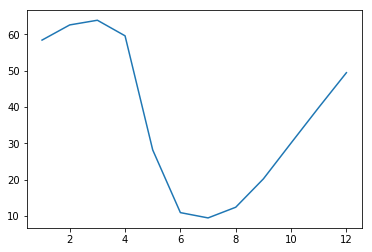

In [6]:
mdata = np.zeros(12)
time = np.linspace(1,12,12)
for i in np.arange(12):
    # read data
    climo_file = climo_root+'/mixedLayerDepth/mpaso_{:02d}_climo.nc'.format(i+1)
    f_climo = Dataset(climo_file, 'r')
    # mld_d
    mld_d = f_climo.variables['timeMonthly_avg_dThreshMLD'][0,:]
    mpaso_mld_d = MPASOMap(data=mld_d, lat=lat, lon=lon, cellarea=cellArea,
                           name='MLD (density threshold)', units='m')
    mdata[i] = mpaso_mld_d.mean(region='LabSea_SD1')
    
# plot figure
plt.plot(time, mdata)
    
# save data
path_mld = fig_root+'/data_ts_LabSea_SD1_avg_dThreshMLD.npz'
np.savez(path_mld, mld=mdata)

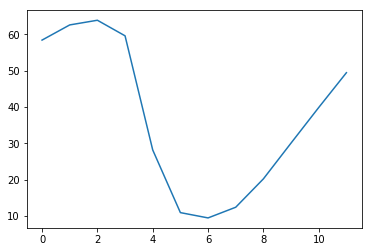

In [7]:
plt.plot(mdata)